In [1]:
import gpw_queries as gpw
from river_inputs_loader import load_river_inputs
import geometry_helper as gh
from shapely.ops import transform
from shapely.geometry import LineString, MultiLineString
import geopandas as gpd

# Filter data

In [2]:
data = gpw.get_sites_by_country("india")

In [3]:
data.keys()

Index(['geometry', 'Distance to Waterway (m)', 'Drainage Direction',
       'Elevation', 'Fine Earth Density (kg / m^3)',
       'Height Above Nearest Drainage (m)', 'Landform Type',
       'Nearest Water Type', 'Population - 1 km', 'Population - 10 km',
       'Population - 5 km', 'Slope (degrees)', 'Soil Clay Fraction',
       'Soil Great Group', 'Soil Sand Fraction',
       'Upstream Drainage Area (km^2)', 'area', 'area (km^2)', 'country', 'id',
       'place_name', 'risk'],
      dtype='object')

In [4]:
data.head()

,geometry,Distance to Waterway (m),Drainage Direction,Elevation,Fine Earth Density (kg / m^3),Height Above Nearest Drainage (m),Landform Type,Nearest Water Type,Population - 1 km,Population - 10 km,...,Soil Clay Fraction,Soil Great Group,Soil Sand Fraction,Upstream Drainage Area (km^2),area,area (km^2),country,id,place_name,risk
0,POINT (77.43796 9.94385),1871.306840842308,east,353,143,21.399993896484375,Upper slope (warm),reservoir,1861,236418,...,0.28,0,0.5,0.025265906006097794,1994.3882920761755,0.0019943882920761755,India,8f603571132eb30,"Veerapandi - Seeppalakottai Road, Theni, Theni...",0.1713068804547574
1,POINT (74.99707 23.35251),739.0126046637928,west,476,154,8.100006103515625,Lower slope (flat),river,1056,287216,...,0.46,0,0.26,0.015720102936029434,5852.5284566601495,0.00585252845666015,India,8f42c92d04d554c,"Junwaniya, Ratlam Nagar Tahsil, Ratlam, Madhya...",0.14673485075254383
2,POINT (74.94934 28.31923),1378.338405725306,northwest,287,147,2.899993896484375,Lower slope (flat),water,2759,108979,...,0.25,0,0.5,0.00754183903336525,1997.3005165642267,0.0019973005165642268,India,8f3da4446642a21,"Gajsar, Churu Tehsil, Churu, Rajasthan, 331001...",0.20297400945017752
3,POINT (70.21870 21.79124),508.62615164536084,southeast,54,159,0,Lower slope (flat),river,3848,120337,...,0.35,0,0.32,4.847708702087402,10409.847647716339,0.010409847647716339,India,8f42c2146d43646,"Upleta Taluka, Rajkot, Gujarat, India",0.24046623006271006
4,POINT (73.48358 22.49636),210.26582578754727,northwest,115,159,4,Lower slope (flat),river,6343,206876,...,0.32,1,0.43,0.01581799052655697,16298.18846145113,0.01629818846145113,India,8f42cab439852a4,"Halol Bypass SH-05, Halol, Halol Taluka, Panch...",0.3084192893633979


In [5]:
data['Distance to Waterway (m)']

0       1871.306840842308
1       739.0126046637928
2       1378.338405725306
3      508.62615164536084
4      210.26582578754727
              ...        
685    336.87317224562213
686    295.26655669173886
687    3170.4405343611684
688    246.84113671488052
689    1105.2848079475004
Name: Distance to Waterway (m), Length: 690, dtype: object

In [6]:
filtered_by_water_proximity = data[data['Distance to Waterway (m)'].astype('float32') <= 500.0]
filtered_by_watertype = filtered_by_water_proximity[(filtered_by_water_proximity['Nearest Water Type'].isin(['water', 'stream', 'river', 'coastline', 'drain', 'canal']))]
filtered = filtered_by_watertype[filtered_by_watertype['Distance to Waterway (m)'].astype('float32') != -1]
print(len(filtered))

204


In [7]:
filtered = filtered.sort_values(['risk', 'Distance to Waterway (m)','area (km^2)'], ascending=[False, True, True])


# Enhanced GPW with other datasets

In [8]:
river_inputs_gdf = load_river_inputs("river_inputs/PlasticRiverInputs.shp")

In [9]:
cross_df = gh.ckd_nearest_point_to_point(filtered, river_inputs_gdf)
cross_df = cross_df[cross_df['dist'].astype('float32') <= 0.1]
cross_df = cross_df.sort_values(["m_out_max"], ascending=False)

In [10]:
print(len(cross_df))
cross_df.head()

33


,geometry,Distance to Waterway (m),Drainage Direction,Elevation,Fine Earth Density (kg / m^3),Height Above Nearest Drainage (m),Landform Type,Nearest Water Type,Population - 1 km,Population - 10 km,...,m_out_jul,m_out_aug,m_out_sep,m_out_oct,m_out_nov,m_out_dec,area,mpw,m_out_max,dist
116,POINT (72.82799 19.23437),466.33569222405686,southeast,6,102,3.700000047683716,Lower slope (warm),river,40916,3.896986e+06,...,6045.920930,3354.204909,1766.731887,169.880640,23.638526,7.929141,55900000.0,8545.614276,6045.920930,0.003343
6,POINT (72.93245 19.07041),117.1822943268658,northeast,6,103,5.5,Upper slope (warm),water,59576,5.645061e+06,...,5322.509081,3091.368991,1550.757481,133.163331,17.144039,5.667009,59200000.0,8040.521620,5322.509081,0.031077
18,POINT (72.92595 19.07180),371.6363457355179,northeast,7,142,6.5,Upper slope (warm),water,82693,5.965058e+06,...,5322.509081,3091.368991,1550.757481,133.163331,17.144039,5.667009,59200000.0,8040.521620,5322.509081,0.037711
21,POINT (72.95175 19.12539),336.32456844585454,northeast,1,101,0.20000004768371582,Lower slope (flat),stream,31183,5.591245e+06,...,5322.509081,3091.368991,1550.757481,133.163331,17.144039,5.667009,59200000.0,8040.521620,5322.509081,0.063798
80,POINT (72.94339 19.12491),129.0561336623587,southwest,1,102,1.399999976158142,Lower slope (flat),stream,65182,5.965949e+06,...,5322.509081,3091.368991,1550.757481,133.163331,17.144039,5.667009,59200000.0,8040.521620,5322.509081,0.065269


In [11]:
print(cross_df.iloc[1])

geometry                                  POINT (72.93244500866533 19.070406174168195)
Distance to Waterway (m)                                             117.1822943268658
Drainage Direction                                                           northeast
Elevation                                                                            6
Fine Earth Density (kg / m^3)                                                      103
Height Above Nearest Drainage (m)                                                  5.5
Landform Type                                                       Upper slope (warm)
Nearest Water Type                                                               water
Population - 1 km                                                                59576
Population - 10 km                                                        5.645061e+06
Population - 5 km                                                         1.728961e+06
Slope (degrees)                            

# Focus on Bombay waterway

In [12]:
# Chosen waterway approximative geo-data 
waterway_main = LineString([(19.067845, 72.958174), (19.058813, 72.942188), (19.075562, 72.929260), (19.075361, 72.922918)])
waterway_finger1 = LineString([(19.075361, 72.922918), (19.084108, 72.925831)])
waterway_finger2 = LineString([(19.075361, 72.922918), (19.077426, 72.918214), (19.084969, 72.916728)])
waterway_finger3 = LineString([(19.075361, 72.922918), (19.067589, 72.918639), (19.065266, 72.912358), (19.070371, 72.909809), (19.073153, 72.903436)])

waterway = MultiLineString([waterway_main, waterway_finger1, waterway_finger2, waterway_finger3])
waterway = transform(lambda x, y: (y, x), waterway)

In [13]:
df = gpd.GeoDataFrame(gpd.GeoSeries(waterway), columns=['geometry'])

<AxesSubplot:>

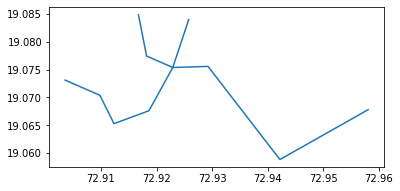

In [14]:
df.plot()

In [15]:
# Keeping all sites nearby
cross_df['waterway dist'] = cross_df.distance(waterway)
waterway_df = cross_df[cross_df['waterway dist'] <= 0.01]
len(waterway_df)

3

We have 3 sites remaining with high plastic output and close data points from the other dataset (river inputs).

In [16]:
waterway_df

,geometry,Distance to Waterway (m),Drainage Direction,Elevation,Fine Earth Density (kg / m^3),Height Above Nearest Drainage (m),Landform Type,Nearest Water Type,Population - 1 km,Population - 10 km,...,m_out_aug,m_out_sep,m_out_oct,m_out_nov,m_out_dec,area,mpw,m_out_max,dist,waterway dist
6,POINT (72.93245 19.07041),117.1822943268658,northeast,6,103,5.5,Upper slope (warm),water,59576,5.645061e+06,...,3091.368991,1550.757481,133.163331,17.144039,5.667009,59200000.0,8040.52162,5322.509081,0.031077,0.000629
18,POINT (72.92595 19.07180),371.6363457355179,northeast,7,142,6.5,Upper slope (warm),water,82693,5.965058e+06,...,3091.368991,1550.757481,133.163331,17.144039,5.667009,59200000.0,8040.52162,5322.509081,0.037711,0.003658
29,POINT (72.93513 19.06160),208.91423138532338,south,6,144,7,Lower slope (flat),water,76615,5.339669e+06,...,3091.368991,1550.757481,133.163331,17.144039,5.667009,59200000.0,8040.52162,5322.509081,0.027380,0.003883


In [ ]:
waterway_df.to_csv("waste_sites_bombay.csv")